## Alternatively

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load the credit data.
df = pd.read_csv(r'G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\credit.csv')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [3]:
# The response variable will be 'Balance.'
x = df.drop('Balance', axis=1)
y = df['Balance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
# Inspect the data types of the DataFrame's columns.
num = []
for col in df.columns[:-1]:
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
num
# df.dtypes

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

In [5]:
### edTest(test_model1) ###
# Fit a linear model using only the numeric features in the dataframe.
numeric_features = num
model1 = LinearRegression().fit(x_train[numeric_features], y_train)

# Report train and test R2 scores.
train_score = model1.score(x_train[numeric_features], y_train)
test_score = model1.score(x_test[numeric_features], y_test)
print('Train R2:', train_score)
print('Test R2:', test_score)

Train R2: 0.8884475002185803
Test R2: 0.8212531865399557


In [6]:
### edTest(test_design) ###
# Create x train and test design matrices creating dummy variables for the categorical.
x_train_design = x_train
x_test_design = x_test
from sklearn.preprocessing import OneHotEncoder
for col in x_train_design:
    if pd.api.types.is_object_dtype(x_train_design[col]):
        enc = OneHotEncoder(drop='first')
        onehotarray = enc.fit_transform(x_train_design[[col]].values).toarray()
        name = [f'{col}_{name}' for name in enc.categories_[0][1:]]
        x_train_design[name] = onehotarray
        del x_train_design[col]

for col in x_test_design:
    if pd.api.types.is_object_dtype(x_test_design[col]):
        enc = OneHotEncoder(drop='first')
        onehotarray = enc.fit_transform(x_test_design[[col]].values).toarray()
        name = [f'{col}_{name}' for name in enc.categories_[0][1:]]
        x_test_design[name] = onehotarray
        del x_test_design[col]

# x_train_design = ___
# x_test_design = ___
x_train_design.head()

,Income,Limit,Rating,Cards,Age,Education,Own_Yes,Student_Yes,Married_Yes,Region_South,Region_West
3,148.924,9504,681,3,36,11,1.0,0.0,0.0,0.0,1.0
18,49.570,6384,448,1,28,9,1.0,0.0,1.0,0.0,1.0
202,21.038,1448,145,2,58,13,1.0,0.0,1.0,1.0,0.0
250,10.363,2430,191,2,47,18,1.0,0.0,1.0,0.0,1.0
274,30.550,5869,439,5,81,9,1.0,0.0,0.0,0.0,0.0


In [7]:
# Confirm that all data types are now numeric.
x_train_design.dtypes

Income          float64
Limit             int64
Rating            int64
Cards             int64
Age               int64
Education         int64
Own_Yes         float64
Student_Yes     float64
Married_Yes     float64
Region_South    float64
Region_West     float64
dtype: object

In [8]:
### edTest(test_model2) ###
# Fit model2 on design matrix
model2 = LinearRegression().fit(x_train_design, y_train)

# Report train and test R2 scores
train_score = model2.score(x_train_design, y_train)
test_score = model2.score(x_test_design, y_test)
print('Train R2:', train_score)
print('Test R2:', test_score)

Train R2: 0.9552255011405162
Test R2: 0.9522674050276461


In [9]:
# Note that the intercept is not a part of .coef_ but is instead stored in .intercept_.
coefs = pd.DataFrame(model2.coef_, index=x_train_design.columns, columns=['beta_value'])
coefs

,beta_value
Income,-7.554059
Limit,0.198058
Rating,0.971292
Cards,19.123826
Age,-0.603695
Education,-1.078674
Own_Yes,-12.493725
Student_Yes,418.435398
Married_Yes,-6.150365
Region_South,11.517153


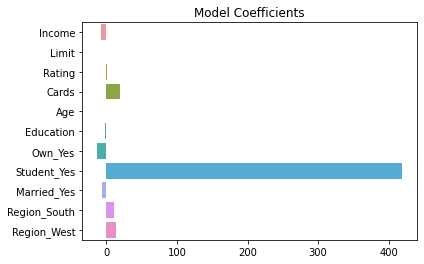

In [10]:
# Visualize crude measure of feature importance.
sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients');

Fit a model to predict Balance from 2 predictors: Income and Student

In [11]:
### edTest(test_model3) ###
# Specify best categorical feature
best_cat_feature = 'Student_Yes'

# Define the model.
features = ['Income', best_cat_feature]
model3 = LinearRegression()
model3.fit(x_train_design[features], y_train)

# Collect betas from fitted model.
beta0 = model3.intercept_
beta1 = model3.coef_[features.index('Income')]
beta2 = model3.coef_[features.index(best_cat_feature)]

# Display betas in a DataFrame.
coefs = pd.DataFrame([beta0, beta1, beta2], index=['Intercept']+features, columns=['beta_value'])
coefs

,beta_value
Intercept,177.658909
Income,6.773090
Student_Yes,371.895694


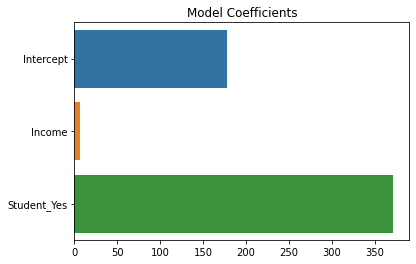

In [12]:
# Visualize crude measure of feature importance.
sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients');